<a href="https://colab.research.google.com/github/Mostafa-Hesham1/Graduation-project/blob/Mostafa-Hesham-220367/vmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d cyizhuo/stanford-cars-by-classes-folder
!unzip stanford-cars-by-classes-folder.zip -d /content/cars_by_classes


Streaming output truncated to the last 5000 lines.
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006128.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006129.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006130.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006131.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006132.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006133.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006134.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006135.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006136.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006137.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen SUV 2009/006138.jpg  
  inflating: /content/cars_by_classes/train/Chrysler Aspen

In [1]:
!pip install -q kaggle

!mkdir -p ~/.kaggle

from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

!mv kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

!unzip -q stanford-car-dataset-by-classes-folder.zip -d /content/car_data


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder
License(s): other
100% 1.83G/1.83G [01:54<00:00, 18.3MB/s]
100% 1.83G/1.83G [01:54<00:00, 17.0MB/s]


In [ ]:
!ls /content/cars_by_classes


README.md  test  train


## **Load Dataset and Prepare Data**

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_dir = '/content/cars_by_classes/train'


In [ ]:
image_data = []

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image_data.append([img_path, class_name])

df_images = pd.DataFrame(image_data, columns=['image_path', 'model_name'])

df_images.head()


image_path              model_name
0  /content/cars_by_classes/train/Dodge Durango S...  Dodge Durango SUV 2012
1  /content/cars_by_classes/train/Dodge Durango S...  Dodge Durango SUV 2012
2  /content/cars_by_classes/train/Dodge Durango S...  Dodge Durango SUV 2012
3  /content/cars_by_classes/train/Dodge Durango S...  Dodge Durango SUV 2012
4  /content/cars_by_classes/train/Dodge Durango S...  Dodge Durango SUV 2012

## **Display Sample Images**

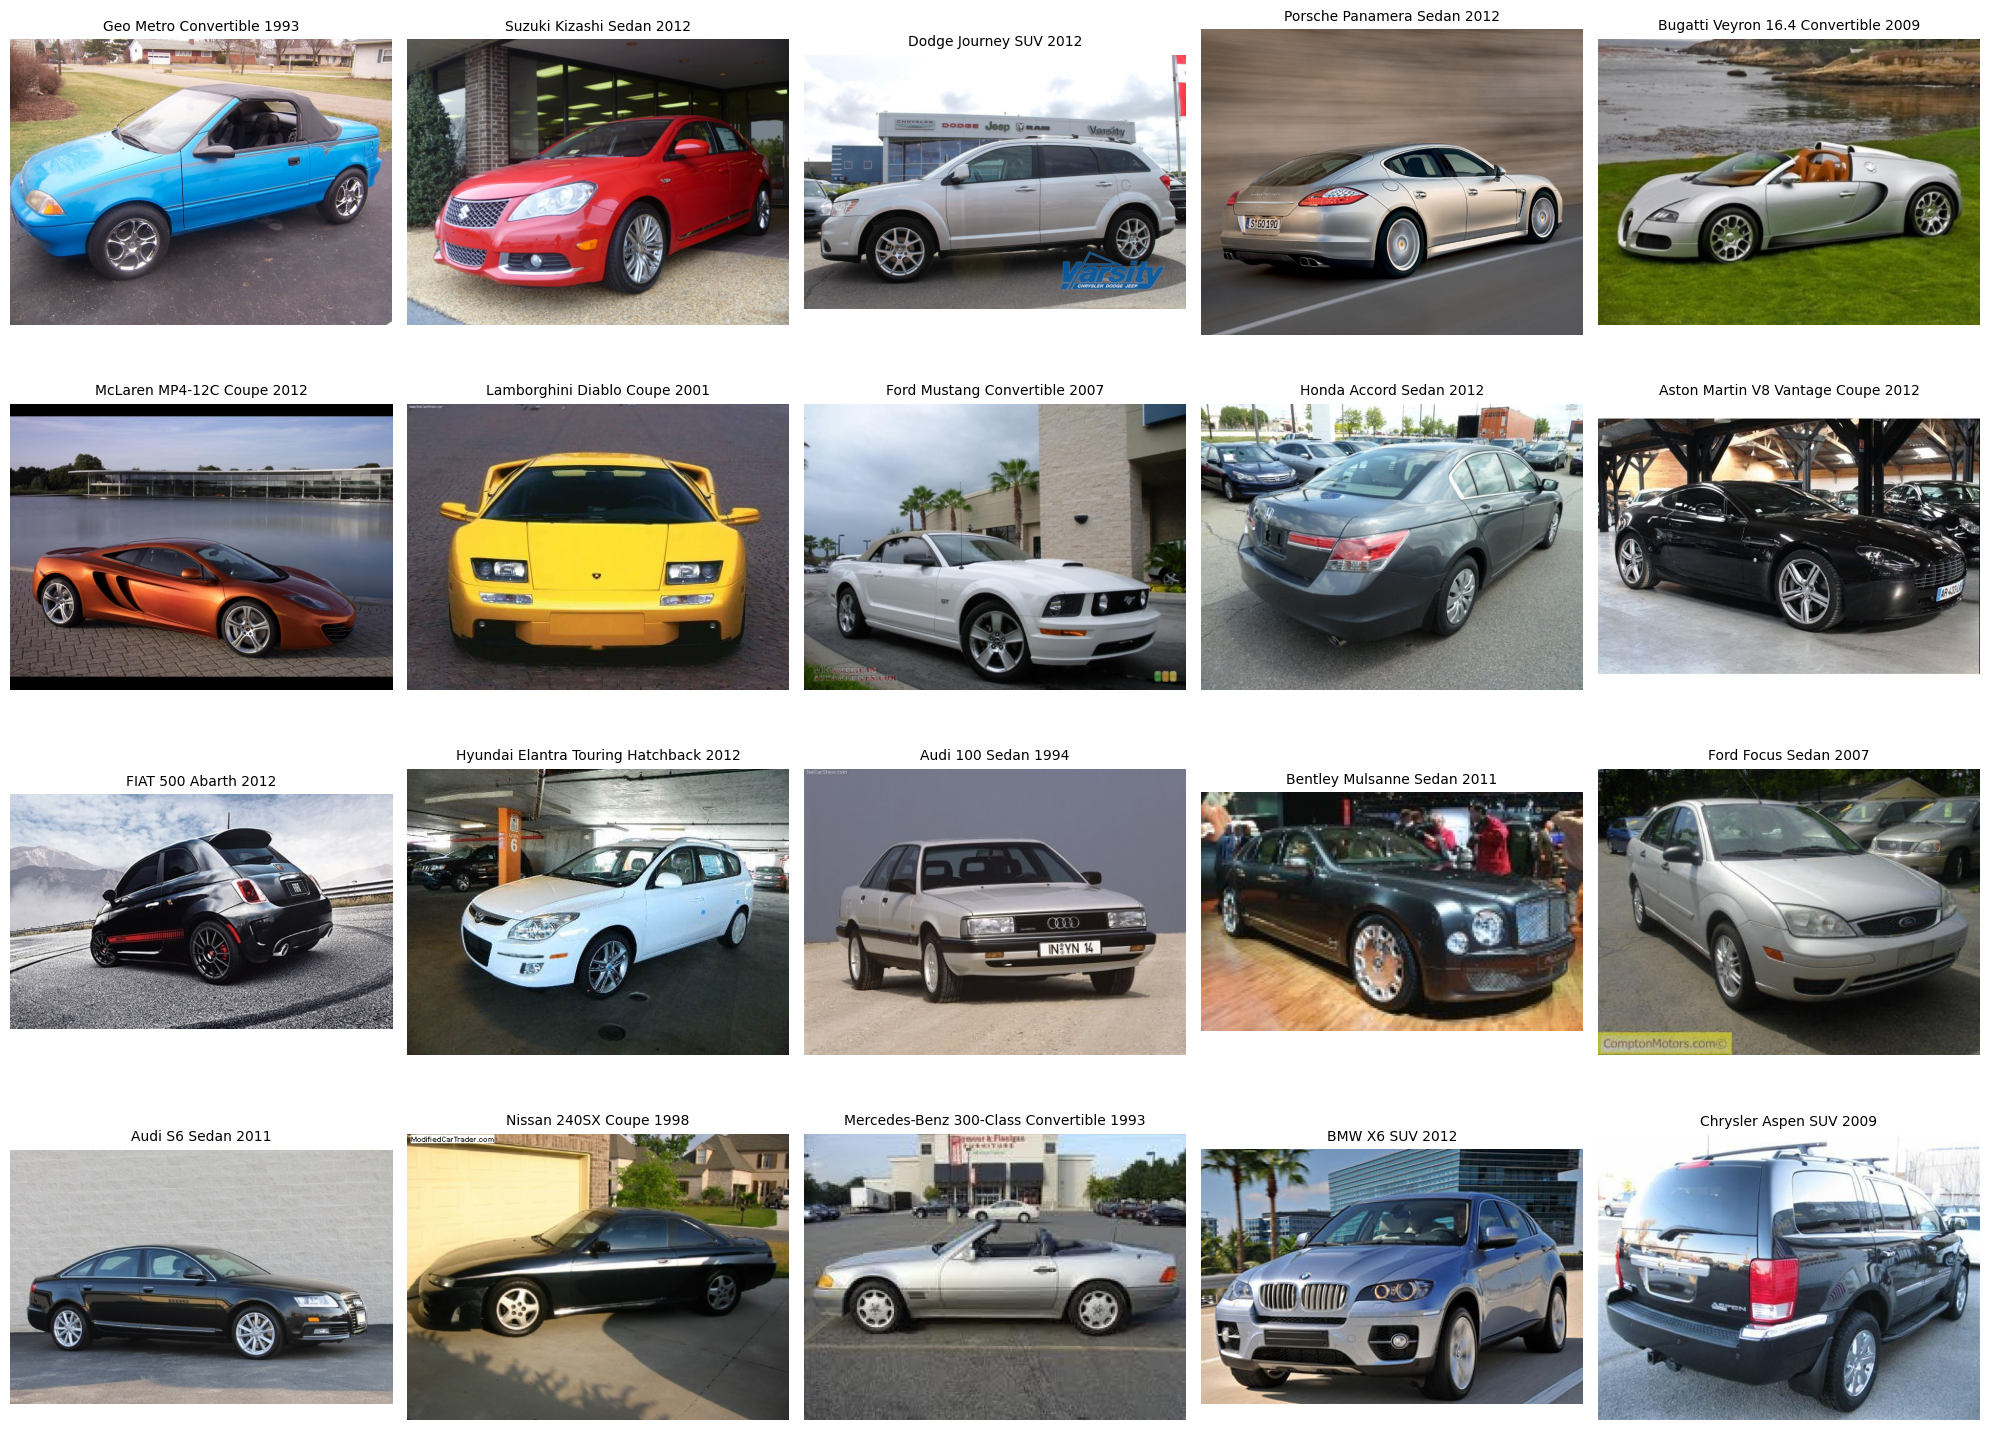

In [ ]:
def display_unique_model_images(df, num_images=20):
    unique_models_df = df.drop_duplicates(subset='model_name').sample(num_images, random_state=42)

    fig, axes = plt.subplots(4, 5, figsize=(20, 15))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        img_path = unique_models_df.iloc[i]['image_path']
        img = mpimg.imread(img_path)
        model_name = unique_models_df.iloc[i]['model_name']
        ax.imshow(img)
        ax.set_title(model_name, fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

display_unique_model_images(df_images, num_images=20)



## Count Classes and Images

In [ ]:
num_classes = len(os.listdir(data_dir))
num_images = sum([len(files) for r, d, files in os.walk(data_dir)])

print(f"Number of classes: {num_classes}")
print(f"Number of images: {num_images}")


Number of classes: 196
Number of images: 8144


## **Check for Missing Data**

In [ ]:
df_images.sample(10)

print("Checking for missing data...")
print(df_images.isna().sum())


Checking for missing data...
image_path    0
model_name    0
dtype: int64


# **Display Class Distribution**

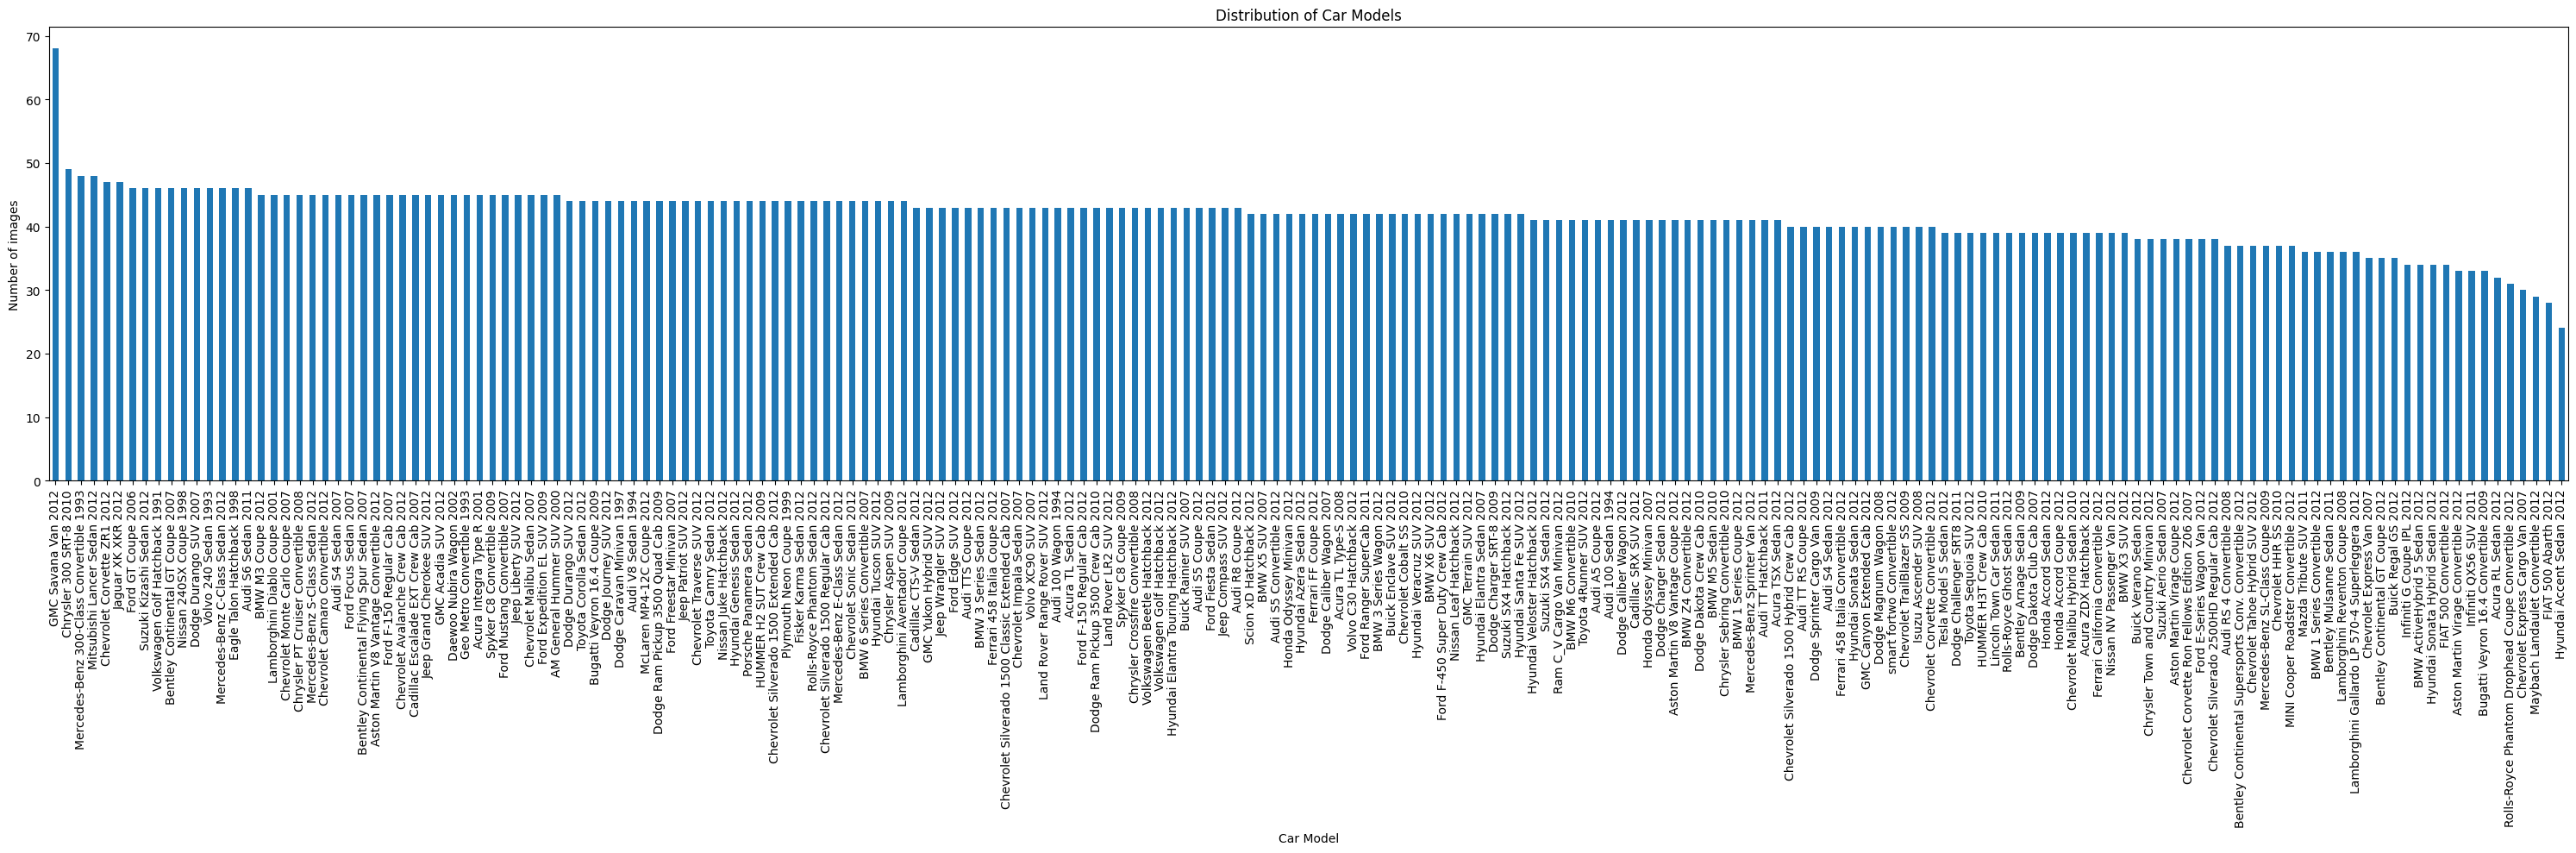

In [ ]:
plt.figure(figsize=(30, 10))
df_images['model_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Car Models')
plt.ylabel('Number of images')
plt.xlabel('Car Model')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

car_model_counts = df_images['model_name'].value_counts().reset_index()

car_model_counts.columns = ['Car Model', 'Number of Images']
print(car_model_counts)
from IPython.display import display
display(car_model_counts)


                                             Car Model  Number of Images
0                                  GMC Savana Van 2012                68
1                              Chrysler 300 SRT-8 2010                49
2             Mercedes-Benz 300-Class Convertible 1993                48
3                         Mitsubishi Lancer Sedan 2012                48
4                          Chevrolet Corvette ZR1 2012                47
..                                                 ...               ...
191  Rolls-Royce Phantom Drophead Coupe Convertible...                31
192                   Chevrolet Express Cargo Van 2007                30
193                 Maybach Landaulet Convertible 2012                29
194                               FIAT 500 Abarth 2012                28
195                          Hyundai Accent Sedan 2012                24

[196 rows x 2 columns]


Car Model  Number of Images
0                                  GMC Savana Van 2012                68
1                              Chrysler 300 SRT-8 2010                49
2             Mercedes-Benz 300-Class Convertible 1993                48
3                         Mitsubishi Lancer Sedan 2012                48
4                          Chevrolet Corvette ZR1 2012                47
..                                                 ...               ...
191  Rolls-Royce Phantom Drophead Coupe Convertible...                31
192                   Chevrolet Express Cargo Van 2007                30
193                 Maybach Landaulet Convertible 2012                29
194                               FIAT 500 Abarth 2012                28
195                          Hyundai Accent Sedan 2012                24

[196 rows x 2 columns]

# **Data Augmentation and Preprocessing**

In [3]:
from fastai.vision.all import *
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

def compute_metrics(preds, targs):
    preds = preds.argmax(dim=1)
    f1 = f1_score(targs, preds, average='weighted')
    precision = precision_score(targs, preds, average='weighted')
    recall = recall_score(targs, preds, average='weighted')
    return f1, precision, recall


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
train_path = '/content/car_data/car_data/car_data/train'
test_path = '/content/car_data/car_data/car_data/test'

dls = ImageDataLoaders.from_folder(
    train_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)],
    bs=64)


/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 176MB/s]


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

SuggestedLRs(valley=0.0008317637839354575)

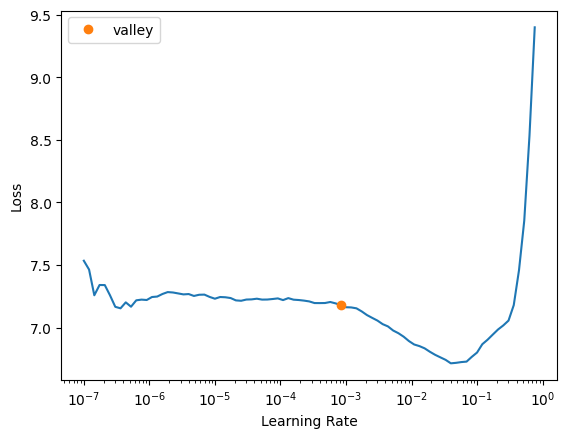

In [6]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy])

learn.lr_find()


In [7]:
learn.fit_one_cycle(80, 3e-3, cbs=[SaveModelCallback(monitor='accuracy', fname='best_model')])

learn.load('best_model')


Better model found at epoch 0 with accuracy value: 0.025184275582432747.
Better model found at epoch 1 with accuracy value: 0.07186732441186905.
Better model found at epoch 2 with accuracy value: 0.1308353841304779.
Better model found at epoch 3 with accuracy value: 0.19164618849754333.
Better model found at epoch 4 with accuracy value: 0.25798526406288147.
Better model found at epoch 5 with accuracy value: 0.3181818127632141.
Better model found at epoch 6 with accuracy value: 0.38943490386009216.
Better model found at epoch 7 with accuracy value: 0.45208844542503357.
Better model found at epoch 8 with accuracy value: 0.49201473593711853.
Better model found at epoch 9 with accuracy value: 0.5423833131790161.
Better model found at epoch 10 with accuracy value: 0.565724790096283.
Better model found at epoch 11 with accuracy value: 0.5909090638160706.
Better model found at epoch 12 with accuracy value: 0.6148648858070374.
Better model found at epoch 13 with accuracy value: 0.6210073828697

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:61: UserWarning: Saved file doesn't contain an optimizer state.
  elif with_opt: warn("Saved file doesn't contain an optimizer state.")


In [1]:
def compute_metrics(preds, targs):
    preds = preds.argmax(dim=1)
    targs = targs
    f1 = f1_score(targs.numpy(), preds.numpy(), average='weighted')
    precision = precision_score(targs.numpy(), preds.numpy(), average='weighted')
    recall = recall_score(targs.numpy(), preds.numpy(), average='weighted')
    return f1, precision, recall
f1, precision, recall = compute_metrics(preds, targs)
print(f'Final Test F1 Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


NameError: name 'preds' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
# Save the final model to Google Drive
learn.export('/content/drive/MyDrive/best_resnet50_car_model.pkl')


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=misclassified)

https://docs.google.com/spreadsheets/d/1lGLZK4-5V3x-9vHwxMxQ8xALNujZ_XDBr7UZPUF0k6s#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


In [ ]:
import pandas as pd
from fastai.vision.all import *
from tqdm.auto import tqdm
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
learn = load_learner('/content/drive/MyDrive/resnet50-car-model.pkl')

# List test images
test_path = '/content/car_data/car_data/test'
test_files = get_image_files(test_path)

# Initialize lists to store results
results = []

# Using tqdm to create a progress bar
for img in tqdm(test_files, desc='Processing images'):
    pred, _, probs = learn.predict(img)
    is_correct = pred == img.parent.name
    results.append({
        'Image': img.name,
        'True Label': img.parent.name,
        'Predicted Label': pred,
        'Probability': max(probs).item(),
        'Correct': is_correct
    })

# Create DataFrame from results
df_results = pd.DataFrame(results)

correctly_classified = df_results[df_results['Correct']]

print("Correctly Classified Examples:")
print(correctly_classified)

correctly_classified.to_csv('/content/drive/MyDrive/correct_classification_results.csv', index=False)
for index, row in correctly_classified.iterrows():
    img_path = test_path + '/' + row['True Label'] + '/' + row['Image']
    image = Image.open(img_path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Predicted: {row['Predicted Label']}\nTrue: {row['True Label']}\nProb: {row['Probability']:.4f}")
    plt.axis('off')
    plt.show()


Processing images:   0%|          | 0/8041 [00:00<?, ?it/s]